# **Universidad Externado de Colombia**
Finanzas Computacionales
- *Trabajo Final de Aplicación*

Integrantes:

1. Harold Esteban Rodríguez Molina
2. Geraldine Lorena Rojas Medina 
3. María Paula Calderón Moreno 





# ***Problema de aplicación***

La firma GHM desea invertir en el sector tecnológico, y para ello, ha seleccionado cuatro posibles activos para invertir dentro de su portafolio. Por lo tanto, a través de las series de tiempo y la simulación de Montecarlo (Movimiento browniano), se desea seleccionar la acción que presente un mejor comportamiento y por ello, se espera que los asesores den una recomendación clara sobre el activo seleccionado.

Las acciones seleccionadas son:

- Electronic Arts (EA)
- Sony Interactive Entertainment (SONY)
-  NVDA Corporation (NVDA)
- Activision (ATVI)

1. Series de tiempo

Con el fin de seleccionar la mejor acción posible, se graficó el comportamiento de los retornos de cada acción. Por lo tanto, se comprobó la kurtosis y el sesgo. Así mismo, se realizó el test de Jarque-Bera y Parkinson para analizar si los datos tienen una distribución normal.


2. Simulación de Monte Carlo (Movimiento browniano)

En términos generales el movimiento Browniano (Wt)t≥0 es un proceso estocástico que satisface:

- W0 = 0 

- Tiene trayectorias continuas.

- Para dos instantes de tiempo s y t, con s < t se tiene que Wt −Ws sigue una distribución normal
con media 0 y varianza t − s.

- Para dos instantes de tiempo s y t, con s < t se tiene que Wt − Ws es independiente de los
valores tomados por el proceso entre 0 y s.

Se usa el movimiento browniano para  simular 50 posibles trayectorias del precio de cierre de las 4 acciones en un periodo de un año y analizar su comportamiento, para posteriormente seleccionar la mejor acción para la firma GHM.




# ***1. Parte series de tiempo***



In [77]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import norm
!pip install yfinance
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [78]:
import yfinance as yf

[*********************100%***********************]  4 of 4 completed


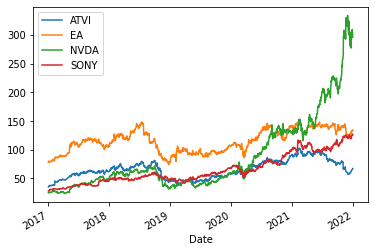

In [79]:
assets=["EA","SONY","NVDA","ATVI"]
data = yf.download(assets, start="2017-01-01", end="2021-12-31")
data= data.loc[:,"Adj Close"]
data.plot()

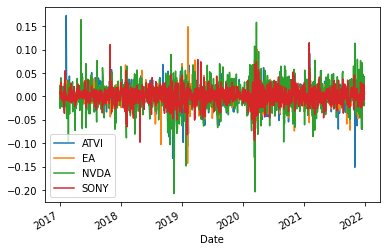

In [80]:
rldata = np.log(data/data.shift(1)).dropna()
rldata.plot()

In [81]:
rets = np.log(data/data.shift(1)).dropna()
rets
rets.max()
rets.min()

ATVI   -0.151515
EA     -0.142776
NVDA   -0.207711
SONY   -0.097904
dtype: float64

In [82]:
mm= ([data.mean(), data.median()])
print(mm)

[ATVI     65.344619
EA      114.969344
NVDA     86.302645
SONY     64.804197
dtype: float64, ATVI     63.450663
EA      115.543617
NVDA     59.748220
SONY     55.725000
dtype: float64]


In [83]:
data.mean() > data.median()

ATVI     True
EA      False
NVDA     True
SONY     True
dtype: bool

In [84]:
corr=rets.corr()
corr

,ATVI,EA,NVDA,SONY
ATVI,1.000000,0.641228,0.456306,0.375171
EA,0.641228,1.000000,0.462064,0.354667
NVDA,0.456306,0.462064,1.000000,0.436230
SONY,0.375171,0.354667,0.436230,1.000000


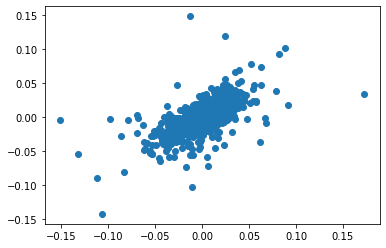

In [85]:
r1 = rets['ATVI']
r2 = rets['EA']
plt.scatter(r1,r2)

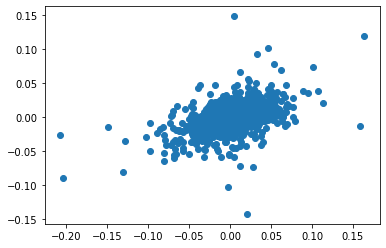

In [86]:
r3 = rets["NVDA"]
r4= rets['EA']
plt.scatter(r3,r4)

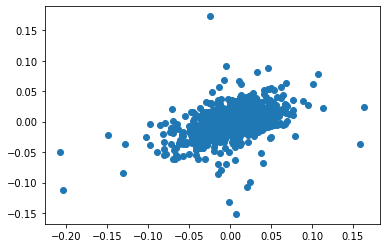

In [87]:
r5= rets["NVDA"]
r6= rets['ATVI']
plt.scatter(r5,r6)

In [88]:
import scipy
s=scipy.stats.skew(rets)#sesgo
K=scipy.stats.kurtosis(rets)#kurtosis
print(s,K)

[-0.43381303 -0.03908563 -0.59565871  0.03812736] [7.65424587 8.08194784 6.24330534 5.36469093]


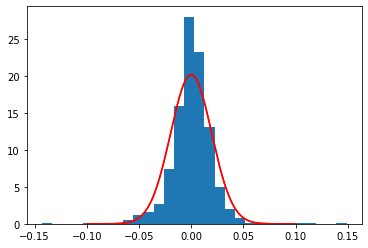

In [89]:
prueba= rets['EA']
mu, sigma =rets["EA"].mean(), rets["EA"].std()
import scipy.stats
import seaborn as sns
from scipy.stats import norm
x = np.linspace(-0.1,0.1,num=1000)

plt.hist(prueba,bins=30,density=True,label="Dist. empirica")
plt.plot(x,norm.pdf(x,scale=sigma),'r',label="Dist. teórica")
plt.plot(x,norm.pdf(x,scale=sigma),"r-",label="Distribución teórica")

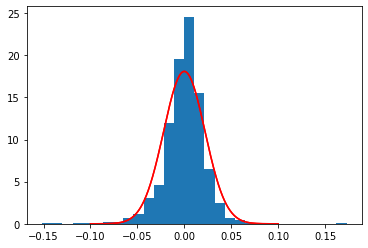

In [90]:
prueba= rets['ATVI']
mu, sigma =rets["ATVI"].mean(), rets["ATVI"].std()
import scipy.stats
import seaborn as sns
from scipy.stats import norm
x = np.linspace(-0.1,0.1,num=1000)

plt.hist(prueba,bins=30,density=True,label="Dist. empirica")
plt.plot(x,norm.pdf(x,scale=sigma),'r',label="Dist. teórica")
plt.plot(x,norm.pdf(x,scale=sigma),"r-",label="Distribución teórica")

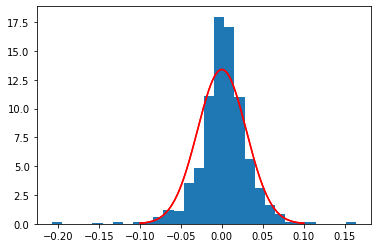

In [91]:
prueba= rets['NVDA']
mu, sigma =rets["NVDA"].mean(), rets["NVDA"].std()
import scipy.stats
import seaborn as sns
from scipy.stats import norm
x = np.linspace(-0.1,0.1,num=1000)

plt.hist(prueba,bins=30,density=True,label="Dist. empirica")
plt.plot(x,norm.pdf(x,scale=sigma),'r',label="Dist. teórica")
plt.plot(x,norm.pdf(x,scale=sigma),"r-",label="Distribución teórica")

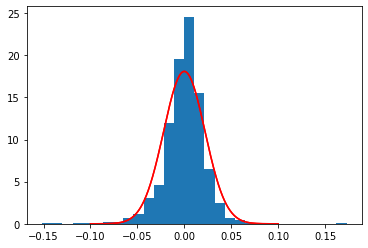

In [92]:
prueba= rets['ATVI']
mu, sigma =rets["ATVI"].mean(), rets["ATVI"].std()
import scipy.stats
import seaborn as sns
from scipy.stats import norm
x = np.linspace(-0.1,0.1,num=1000)

plt.hist(prueba,bins=30,density=True,label="Dist. empirica")
plt.plot(x,norm.pdf(x,scale=sigma),'r',label="Dist. teórica")
plt.plot(x,norm.pdf(x,scale=sigma),"r-",label="Distribución teórica")

In [93]:
import scipy.stats
scipy.stats.jarque_bera(r1)

(3107.945845005365, 0.0)

In [94]:
scipy.stats.jarque_bera(r2)

(3421.3440590286395, 0.0)

In [95]:
scipy.stats.jarque_bera(r3)

(2115.8504201585706, 0.0)

In [96]:
scipy.stats.jarque_bera(r4)

(3421.3440590286395, 0.0)

In [97]:
KF=scipy.stats.kstest(rets["EA"], "norm")
KB=scipy.stats.kstest(rets["SONY"], "norm")
KG=scipy.stats.kstest(rets["NVDA"], "norm")
KK=scipy.stats.kstest(rets["ATVI"], "norm")
print('Kolmogorov "EA"',KF)
print('Kolmogorov "EA"',KB)
print('Kolmogorov "EA"',KG)
print('Kolmogorov "EA"',KK)


Kolmogorov "EA" KstestResult(statistic=0.4722458413871746, pvalue=8.596513916618307e-258)
Kolmogorov "EA" KstestResult(statistic=0.4742211170891602, pvalue=4.400379157819757e-260)
Kolmogorov "EA" KstestResult(statistic=0.46284024895287024, pvalue=4.753948866605309e-247)
Kolmogorov "EA" KstestResult(statistic=0.4694438121656995, pvalue=1.4561849393394642e-254)


In [98]:
from statsmodels.tsa.stattools import adfuller
resultado = adfuller(rets["EA"])
resultado
print('ADF Statistic: %f' % resultado[0])
print('p-value: %f' % resultado[1])
print('Critical Values:')
for key, value in resultado[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.079488
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [99]:
from statsmodels.tsa.stattools import adfuller
resultado = adfuller(rets["SONY"])
resultado
print('ADF Statistic: %f' % resultado[0])
print('p-value: %f' % resultado[1])
print('Critical Values:')
for key, value in resultado[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.309447
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [100]:
from statsmodels.tsa.stattools import adfuller
resultado = adfuller(rets["NVDA"])
resultado
print('ADF Statistic: %f' % resultado[0])
print('p-value: %f' % resultado[1])
print('Critical Values:')
for key, value in resultado[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.205892
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [101]:
from statsmodels.tsa.stattools import adfuller
resultado = adfuller(rets["ATVI"])
resultado
print('ADF Statistic: %f' % resultado[0])
print('p-value: %f' % resultado[1])
print('Critical Values:')
for key, value in resultado[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.197800
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


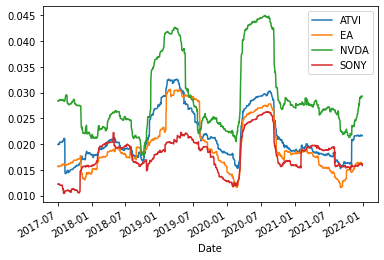

In [102]:
r_std = rets.rolling(window=125).std()
r_std.plot()

#Primera accion 

In [103]:
#Parkinson
assets=["EA"]
data=yf.download(assets,start="2017-01-01",end="2021-12-31")
preciosadj= data.loc[:,"Adj Close"]
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,79.519997,79.620003,78.269997,79.169998,78.567276,2187300
2017-01-04,79.389999,81.110001,79.120003,80.629997,80.016151,1852300
2017-01-05,79.980003,80.459999,78.730003,78.959999,78.358871,3295000
2017-01-06,79.110001,79.519997,78.370003,79.010002,78.408508,2017700
2017-01-09,79.190002,79.430000,78.050003,78.639999,78.041306,2332300
...,...,...,...,...,...,...
2021-12-23,131.279999,133.009995,130.860001,132.539993,132.361542,1594000
2021-12-27,133.270004,133.750000,132.300003,133.039993,132.860870,1377300
2021-12-28,133.240005,134.970001,133.039993,133.470001,133.290298,1230700


In [104]:
#Parkinson

lnHL =np.log(data["High"]/data["Low"]).dropna()
lnHL

Date
2017-01-03    0.017101
2017-01-04    0.024841
2017-01-05    0.021736
2017-01-06    0.014567
2017-01-09    0.017526
                ...   
2021-12-23    0.016296
2021-12-27    0.010900
2021-12-28    0.014403
2021-12-29    0.017139
2021-12-30    0.014111
Length: 1258, dtype: float64

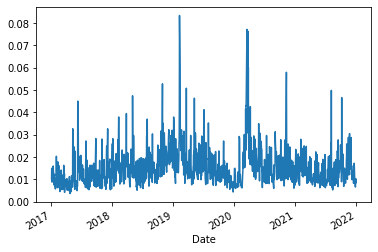

In [105]:
lnHL =np.log(data["High"]/data["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_d.plot()

#Segunda accion 


In [106]:
assets=["SONY"]
data=yf.download(assets,start="2017-01-01",end="2021-12-31")
preciosadj= data.loc[:,"Adj Close"]
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.100000,28.320000,28.040001,28.290001,28.290001,894900
2017-01-04,28.480000,28.660000,28.420000,28.580000,28.580000,910500
2017-01-05,28.540001,28.790001,28.430000,28.719999,28.719999,1027500
2017-01-06,28.570000,29.040001,28.530001,28.959999,28.959999,964800
2017-01-09,28.740000,28.950001,28.740000,28.820000,28.820000,648700
...,...,...,...,...,...,...
2021-12-23,123.750000,124.269997,123.110001,123.860001,123.860001,514400
2021-12-27,125.080002,127.400002,124.739998,127.209999,127.209999,548200
2021-12-28,128.000000,128.300003,127.279999,127.480003,127.480003,415700


In [107]:
lnHL =np.log(data["High"]/data["Low"]).dropna()
lnHL

Date
2017-01-03    0.009936
2017-01-04    0.008409
2017-01-05    0.012583
2017-01-06    0.017718
2017-01-09    0.007280
                ...   
2021-12-23    0.009378
2021-12-27    0.021100
2021-12-28    0.007982
2021-12-29    0.006550
2021-12-30    0.007368
Length: 1258, dtype: float64

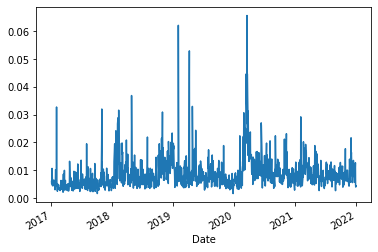

In [108]:
lnHL =np.log(data["High"]/data["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_d.plot()

#Tercera accion 


In [109]:
assets=["NVDA"]
data=yf.download(assets,start="2017-01-01",end="2021-12-31")
preciosadj= data.loc[:,"Adj Close"]
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,26.100000,26.592501,24.844999,25.502501,25.166451,150199600
2017-01-04,25.850000,26.375000,25.382500,26.097500,25.753605,119922000
2017-01-05,26.132500,26.455000,25.262501,25.434999,25.099838,98429600
2017-01-06,25.712500,26.062500,25.299999,25.775000,25.435354,82285600
2017-01-09,25.875000,27.000000,25.875000,26.820000,26.466587,91624800
...,...,...,...,...,...,...
2021-12-23,297.549988,300.589996,294.309998,296.399994,296.349487,34302200
2021-12-27,296.600006,310.869995,296.399994,309.450012,309.397308,40368600
2021-12-28,313.119995,313.299988,300.119995,303.220001,303.168335,42059100


In [110]:
lnHL =np.log(data["High"]/data["Low"]).dropna()
lnHL

Date
2017-01-03    0.067973
2017-01-04    0.038357
2017-01-05    0.046124
2017-01-06    0.029693
2017-01-09    0.042560
                ...   
2021-12-23    0.021114
2021-12-27    0.047665
2021-12-28    0.042979
2021-12-29    0.039462
2021-12-30    0.030571
Length: 1258, dtype: float64

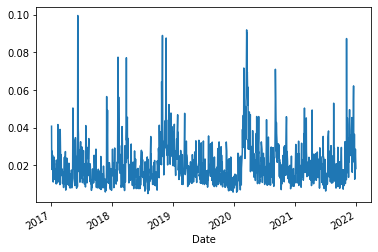

In [111]:
lnHL =np.log(data["High"]/data["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_d.plot()

#Cuarta accion


In [112]:
assets=["ATVI"]
data=yf.download(assets,start="2017-01-01",end="2021-12-31")
preciosadj= data.loc[:,"Adj Close"]
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,36.439999,36.790001,36.180000,36.639999,35.324673,8360600
2017-01-04,36.770000,37.529999,36.639999,37.360001,36.018826,7643000
2017-01-05,37.500000,38.270000,37.389999,37.939999,36.578003,9814400
2017-01-06,37.950001,38.189999,37.820000,37.910000,36.549080,8364900
2017-01-09,38.090000,38.160000,37.369999,37.700001,36.346619,5432400
...,...,...,...,...,...,...
2021-12-23,64.010002,65.389999,63.860001,65.160004,64.774979,8721700
2021-12-27,65.239998,65.739998,65.000000,65.449997,65.063255,10640700
2021-12-28,66.059998,67.589996,65.599998,66.669998,66.276047,13806800


In [113]:
lnHL =np.log(data["High"]/data["Low"]).dropna()
lnHL

Date
2017-01-03    0.016720
2017-01-04    0.024000
2017-01-05    0.023263
2017-01-06    0.009736
2017-01-09    0.020920
                ...   
2021-12-23    0.023676
2021-12-27    0.011320
2021-12-28    0.029884
2021-12-29    0.014846
2021-12-30    0.012450
Length: 1258, dtype: float64

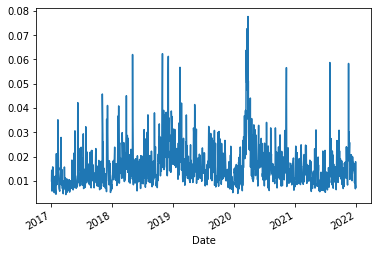

In [114]:
lnHL =np.log(data["High"]/data["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_d.plot()

# Calculando volatilidad

In [115]:
#Desviación estándar
import math
raapl =np.log(preciosadj/preciosadj.shift(1)).dropna()
sigma_d= raapl.std()
sigma_a= sigma_d*math.sqrt(252)
sigma_a

0.35025374602650966

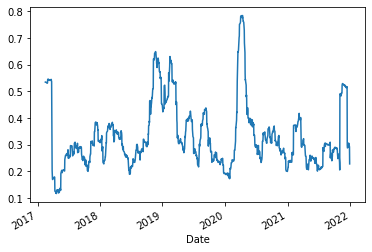

In [116]:
r_std=(raapl.rolling(window=30).std())*math.sqrt(252)
r_std.plot()

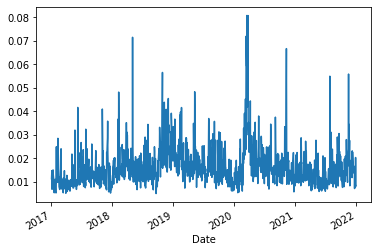

In [117]:
#Garman-Klass
lnHL =np.log(data["High"]/data["Low"]).dropna()
lnCO =np.log(data["Close"]/data["Open"]).dropna()
sigmaGK_d = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK_d.plot()

In [118]:
lnHL =np.log(data["High"]/data["Low"]).dropna()
lnCO =np.log(data["Close"]/data["Open"]).dropna()
sigmaGK_d = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK=(sigmaGK_d.mean())*math.sqrt(252)
sigmaGK

0.2591214047320808

In [119]:
#EWMA
def volEWMA(Retornos,Lambda):
  m = len(Retornos)
  s = np.arange(m-1,-1,-1)
  vecLambda = np.repeat(Lambda,m)
  vecLambdak = np.power(vecLambda,s)

  vewma = ((np.power(Retornos,2)*vecLambdak).sum())*(1-Lambda)
  volEWMA = math.sqrt(vewma)
  return(volEWMA)
  

In [120]:
Lambda=0.94
volEWMA(raapl,Lambda)

0.01861685755537387

In [121]:
Lambda = 0.94
volewma_d = volEWMA(raapl,Lambda)
volewma_d*math.sqrt(252)

0.29553345171019885

In [122]:
#activo "EA"
Lambda = 0.94
volEWMAanual = volEWMA(r1,Lambda)*math.sqrt(252)
volEWMAanual

0.29553345171019885

In [123]:
#activo "SONY"
Lambda = 0.94
volEWMAanual = volEWMA(r2,Lambda)*math.sqrt(252)
volEWMAanual

0.22283156720345285

In [124]:
#activo "NVDA"
Lambda = 0.94
volEWMAanual = volEWMA(r3,Lambda)*math.sqrt(252)
volEWMAanual

0.5836078500600159

In [125]:
#activo "ATVI"
Lambda = 0.94
volEWMAanual = volEWMA(r4,Lambda)*math.sqrt(252)
volEWMAanual

0.22283156720345285

#***2. Simulación de Monte Carlo (Movimiento Browniano)***

# **Simulación para Electronic Arts**

In [126]:
EA = yf.download("EA", start="2017-01-01",end="2021-12-31")
EA = EA.loc[:,"Adj Close"]
EA = np.log(EA/EA.shift(1)).dropna()

[*********************100%***********************]  1 of 1 completed


In [127]:
#Simulación movimiento browniano
T= 1
n=365
dt= T/n
Nsim= 50
dt

0.0027397260273972603

In [128]:
#Media
M= np.mean(EA)
M

0.0004263835791514919

In [129]:
#Varianza
V= np.var([EA], ddof=0)
V

0.00038902402222309513

In [130]:
Sigma=np.sqrt(V/dt)
Sigma

0.3768206046800383

In [131]:
Alfa=(M/dt)+((Sigma**2)/2)
Alfa

0.2266268904460094

In [132]:
MM= (Alfa - Sigma**2/2)*dt
MM

0.00042638357915149186

In [133]:
#Matriz que guarda los valores de Wt

W=np.zeros((n+1,Nsim))

for j in range(Nsim):
  for i in range(n):
    Z=np.random.rand()
    W[i+1, j]=W[i, j]+np.sqrt(dt)*Z

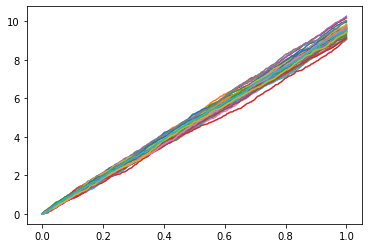

In [134]:
Tiempo= np.linspace(0, T, n+1)
for j in range(Nsim):
  plt.plot(Tiempo, W[:, j])

In [135]:
S0= EA.iloc[-1]
T= 1
n= 365
dt= T/n
nsim= 50

In [136]:
S=np.zeros((n+1,nsim))
S[0, :] = S0
for j in range(nsim):
  for i in range(n):
    Z=np.random.randn()
    S[i+1,j]=S[i,j]*np.exp((Alfa-0.5*Sigma**2)*dt+Sigma*np.sqrt(dt)*Z)

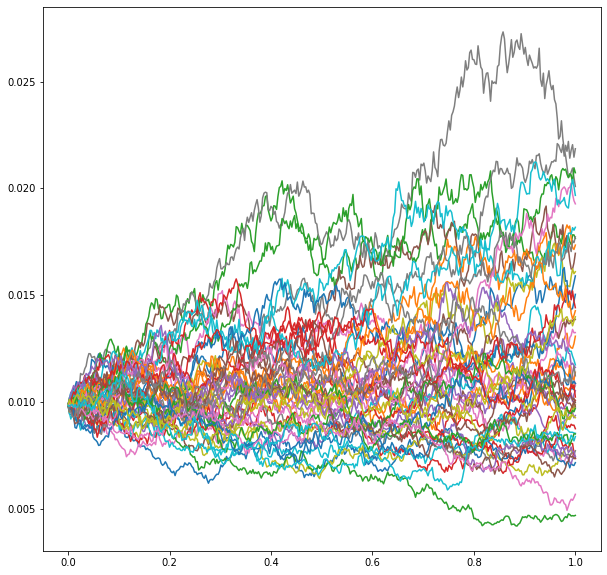

In [137]:
plt.figure(figsize=(10, 10))
Tiempo= np.linspace(0, T, n+1)
for j in range(nsim):
  plt.plot(Tiempo, S[:,j])

# **Simulación para Sony**

In [138]:
SONY = yf.download("SONY", start="2017-01-01",end="2021-12-31")
SONY = SONY.loc[:,"Adj Close"]
SONY = np.log(SONY/SONY.shift(1)).dropna()

[*********************100%***********************]  1 of 1 completed


In [139]:
#Simulación movimiento browniano
T= 1
n=365
dt= T/n
Nsim= 50
dt

0.0027397260273972603

In [140]:
#Media
M= np.mean(SONY)
M

0.0011878586733905963

In [141]:
#Varianza
V= np.var([SONY], ddof=0)
V

0.0003225936860637892

In [142]:
Sigma=np.sqrt(V/dt)
Sigma

0.3431423835862936

In [143]:
Alfa=(M/dt)+((Sigma**2)/2)
Alfa

0.4924417634942092

In [144]:
MM= (Alfa - Sigma**2/2)*dt
MM

0.0011878586733905963

In [145]:
#Matriz que guarda los valores de Wt

W=np.zeros((n+1,Nsim))

for j in range(Nsim):
  for i in range(n):
    Z=np.random.rand()
    W[i+1, j]=W[i, j]+np.sqrt(dt)*Z

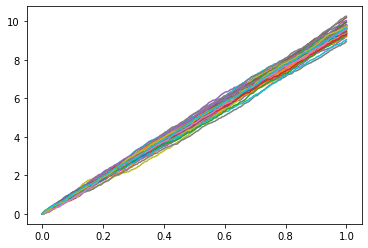

In [146]:
Tiempo= np.linspace(0, T, n+1)
for j in range(Nsim):
  plt.plot(Tiempo, W[:, j])

In [147]:
S0= SONY.iloc[-1]
T= 1
n= 365
dt= T/n
nsim= 50

In [148]:
S=np.zeros((n+1,nsim))
S[0, :] = S0
for j in range(nsim):
  for i in range(n):
    Z=np.random.randn()
    S[i+1,j]=S[i,j]*np.exp((Alfa-0.5*Sigma**2)*dt+Sigma*np.sqrt(dt)*Z)

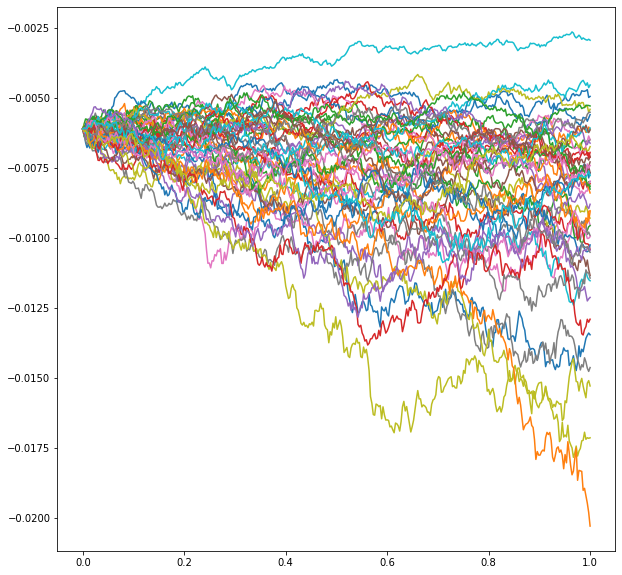

In [149]:
plt.figure(figsize=(10, 10))
Tiempo= np.linspace(0, T, n+1)
for j in range(nsim):
  plt.plot(Tiempo, S[:,j])

# **Simulación para NVDA Corporation**

In [150]:
NVDA = yf.download("NVDA", start="2017-01-01",end="2021-12-31")
NVDA = NVDA.loc[:,"Adj Close"]
NVDA = np.log(NVDA/NVDA.shift(1)).dropna()

[*********************100%***********************]  1 of 1 completed


In [151]:
#Simulación movimiento browniano
T= 1
n=365
dt= T/n
Nsim= 50
dt

0.0027397260273972603

In [152]:
#Media
M= np.mean(NVDA)
M

0.0019603853463250036

In [153]:
#Varianza
V= np.var([NVDA], ddof=0)
V

0.0008862008094850454

In [154]:
Sigma=np.sqrt(V/dt)
Sigma

0.5687383365503345

In [155]:
Alfa=(M/dt)+((Sigma**2)/2)
Alfa

0.8772722991396471

In [156]:
MM= (Alfa - Sigma**2/2)*dt
MM

0.0019603853463250036

In [157]:
#Matriz que guarda los valores de Wt

W=np.zeros((n+1,Nsim))

for j in range(Nsim):
  for i in range(n):
    Z=np.random.rand()
    W[i+1, j]=W[i, j]+np.sqrt(dt)*Z

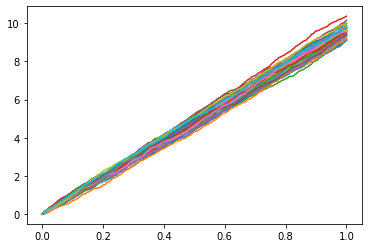

In [158]:
Tiempo= np.linspace(0, T, n+1)
for j in range(Nsim):
  plt.plot(Tiempo, W[:, j])

In [159]:
S0= NVDA.iloc[-1]
T= 1
n= 365
dt= T/n
nsim= 50

In [160]:
S=np.zeros((n+1,nsim))
S[0, :] = S0
for j in range(nsim):
  for i in range(n):
    Z=np.random.randn()
    S[i+1,j]=S[i,j]*np.exp((Alfa-0.5*Sigma**2)*dt+Sigma*np.sqrt(dt)*Z)

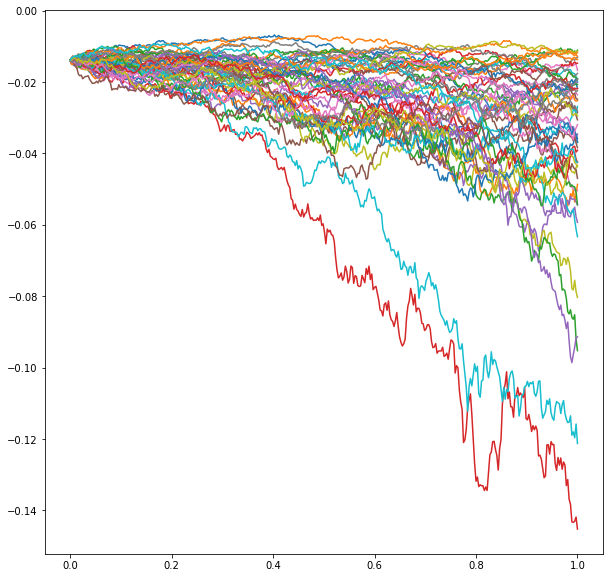

In [161]:
plt.figure(figsize=(10, 10))
Tiempo= np.linspace(0, T, n+1)
for j in range(nsim):
  plt.plot(Tiempo, S[:,j])

# **Simulación para Activision**

In [162]:
ATVI = yf.download("ATVI", start="2017-01-01",end="2021-12-31")
ATVI = ATVI.loc[:,"Adj Close"]
ATVI = np.log(ATVI/ATVI.shift(1)).dropna()

[*********************100%***********************]  1 of 1 completed


In [163]:
#Simulación movimiento browniano
T= 1
n=365
dt= T/n
Nsim= 50
dt

0.0027397260273972603

In [164]:
#Media
M= np.mean(ATVI)
M

0.0005103192993508722

In [165]:
#Varianza
V= np.var([ATVI], ddof=0)
V

0.0004864288270104381

In [166]:
Sigma=np.sqrt(V/dt)
Sigma

0.42136269633038226

In [167]:
Alfa=(M/dt)+((Sigma**2)/2)
Alfa

0.2750398051924733

In [168]:
MM= (Alfa - Sigma**2/2)*dt
MM

0.0005103192993508721

In [169]:
#Matriz que guarda los valores de Wt

W=np.zeros((n+1,Nsim))

for j in range(Nsim):
  for i in range(n):
    Z=np.random.rand()
    W[i+1, j]=W[i, j]+np.sqrt(dt)*Z

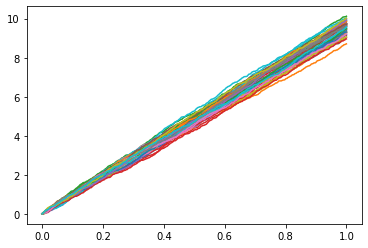

In [170]:
Tiempo= np.linspace(0, T, n+1)
for j in range(Nsim):
  plt.plot(Tiempo, W[:, j])

In [171]:
S0= ATVI.iloc[-1]
T= 1
n= 365
dt= T/n
nsim= 50

In [172]:
S=np.zeros((n+1,nsim))
S[0, :] = S0
for j in range(nsim):
  for i in range(n):
    Z=np.random.randn()
    S[i+1,j]=S[i,j]*np.exp((Alfa-0.5*Sigma**2)*dt+Sigma*np.sqrt(dt)*Z)

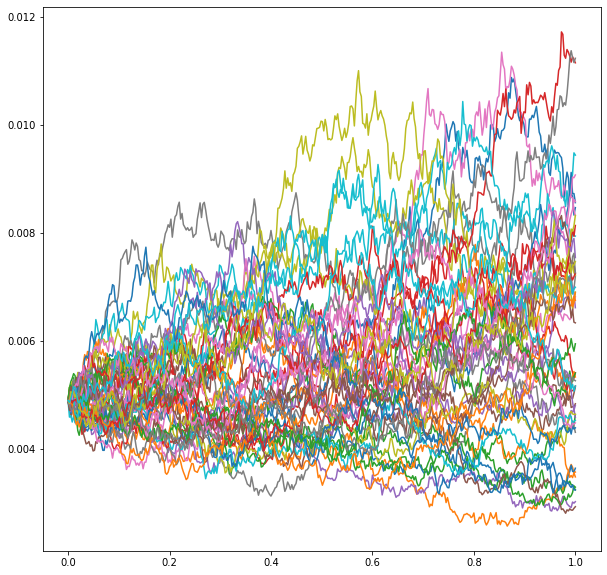

In [173]:
plt.figure(figsize=(10, 10))
Tiempo= np.linspace(0, T, n+1)
for j in range(nsim):
  plt.plot(Tiempo, S[:,j])